In [1]:
from selenium import webdriver
import pandas as pd

In [2]:
driver=webdriver.Chrome()

In [3]:
driver.get('https://finance.yahoo.com/')

In [4]:
import time;
time.sleep(2)
driver.find_element_by_xpath("//input[@aria-label='Search for news, symbols or companies']").send_keys('TSLA')
time.sleep(2)
driver.find_element_by_xpath("//button[@id='header-desktop-search-button']").click()
time.sleep(2)
driver.find_element_by_xpath("//span[text()='Historical Data']").click()
time.sleep(2)
driver.find_element_by_xpath("//span[text()='Jan 29, 2021 - Jan 29, 2022']").click()
time.sleep(2)
driver.find_element_by_xpath("//span[text()='Max']").click()
time.sleep(2)
driver.find_element_by_xpath("//span[text()='Apply']").click()
time.sleep(2)






In [5]:
SCROLL_PAUSE_TIME = 0.5
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height




In [6]:
element = driver.find_element_by_xpath("//span[text()='*Close price adjusted for splits.']");
driver.execute_script("arguments[0].scrollIntoView(true);", element);
time.sleep(2); 

    
from bs4 import BeautifulSoup
soup=BeautifulSoup(driver.page_source)
table=soup.find('table', class_='W(100%) M(0)')
headers=[]
for th in table.find('thead').find_all('th'):
    headers.append(th.text)
headers

['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

In [7]:
df=pd.DataFrame(columns=headers)
df

,Date,Open,High,Low,Close*,Adj Close**,Volume


In [8]:
for row in table.find('tbody').find_all('tr'):
    col=row.find_all('td')
    temp=[]
    for x in col:
        temp.append(x.text)
    df.loc[len(df)]=temp
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 28, 2022",831.56,857.50,792.01,846.35,846.35,"44,340,957"
1,"Jan 27, 2022",933.36,935.39,829.00,829.10,829.10,"48,475,400"
2,"Jan 26, 2022",952.43,987.69,906.00,937.41,937.41,"33,425,700"
3,"Jan 25, 2022",914.20,951.26,903.21,918.40,918.40,"28,865,300"
4,"Jan 24, 2022",904.76,933.51,851.47,930.00,930.00,"50,791,700"
...,...,...,...,...,...,...,...
95,"Sep 14, 2021",742.57,754.47,736.40,744.49,744.49,"18,524,900"
96,"Sep 13, 2021",740.21,744.78,708.85,743.00,743.00,"22,952,500"
97,"Sep 10, 2021",759.60,762.61,734.52,736.27,736.27,"15,114,300"
98,"Sep 09, 2021",753.41,762.10,751.63,754.86,754.86,"14,077,700"


In [9]:
df=df[::-1]
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
99,"Sep 08, 2021",761.58,764.45,740.77,753.87,753.87,"18,793,000"
98,"Sep 09, 2021",753.41,762.10,751.63,754.86,754.86,"14,077,700"
97,"Sep 10, 2021",759.60,762.61,734.52,736.27,736.27,"15,114,300"
96,"Sep 13, 2021",740.21,744.78,708.85,743.00,743.00,"22,952,500"
95,"Sep 14, 2021",742.57,754.47,736.40,744.49,744.49,"18,524,900"
...,...,...,...,...,...,...,...
4,"Jan 24, 2022",904.76,933.51,851.47,930.00,930.00,"50,791,700"
3,"Jan 25, 2022",914.20,951.26,903.21,918.40,918.40,"28,865,300"
2,"Jan 26, 2022",952.43,987.69,906.00,937.41,937.41,"33,425,700"
1,"Jan 27, 2022",933.36,935.39,829.00,829.10,829.10,"48,475,400"


In [10]:
df.reset_index(drop=True, inplace=True)
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Sep 08, 2021",761.58,764.45,740.77,753.87,753.87,"18,793,000"
1,"Sep 09, 2021",753.41,762.10,751.63,754.86,754.86,"14,077,700"
2,"Sep 10, 2021",759.60,762.61,734.52,736.27,736.27,"15,114,300"
3,"Sep 13, 2021",740.21,744.78,708.85,743.00,743.00,"22,952,500"
4,"Sep 14, 2021",742.57,754.47,736.40,744.49,744.49,"18,524,900"
...,...,...,...,...,...,...,...
95,"Jan 24, 2022",904.76,933.51,851.47,930.00,930.00,"50,791,700"
96,"Jan 25, 2022",914.20,951.26,903.21,918.40,918.40,"28,865,300"
97,"Jan 26, 2022",952.43,987.69,906.00,937.41,937.41,"33,425,700"
98,"Jan 27, 2022",933.36,935.39,829.00,829.10,829.10,"48,475,400"


In [11]:
df['Close*']=df['Close*'].apply(lambda x: x.replace(',','')).apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         100 non-null    object 
 1   Open         100 non-null    object 
 2   High         100 non-null    object 
 3   Low          100 non-null    object 
 4   Close*       100 non-null    float64
 5   Adj Close**  100 non-null    object 
 6   Volume       100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [12]:
import numpy as np
data=df[['Close*']]
dataset=np.array(data)
type(dataset)

numpy.ndarray

In [13]:
training_data_len=int(len(dataset)*0.8)
print(training_data_len)

80


/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


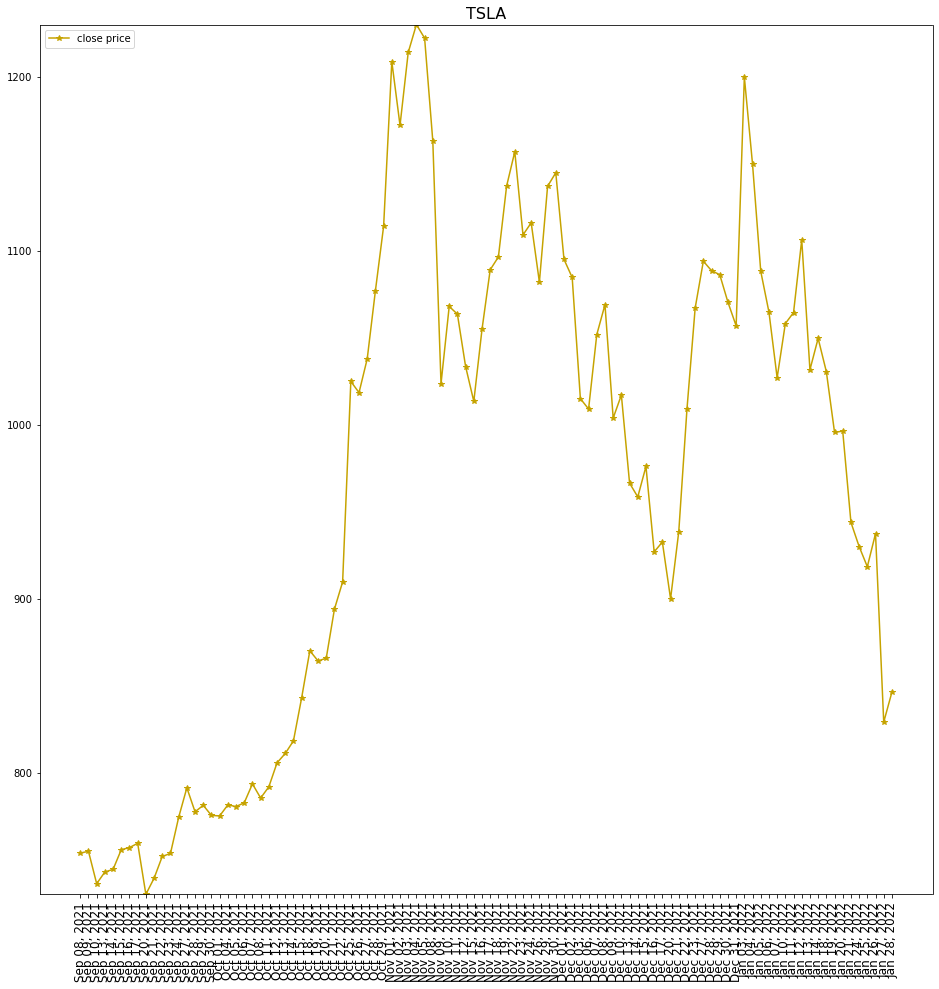

In [14]:
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1, figsize=(16,16))
axs.plot(df['Date'], df['Close*'], marker="*", color='#C6A300', label='close price')
axs.set_title('TSLA', loc='center', fontsize=16)
axs.set_xticklabels(df['Date'], fontsize=12, rotation=90)
# axs.set_yticks(fontsize=12)
plt.ylim([min(df['Close*']), max(df['Close*'])])
plt.legend(loc='upper left')

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04742466],
       [0.04940569],
       [0.01220635],
       [0.02567335],
       [0.0286549 ],
       [0.0513467 ],
       [0.05366791],
       [0.05867051],
       [0.        ],
       [0.01842958],
       [0.04356265],
       [0.04696442],
       [0.08848601],
       [0.12244367],
       [0.09482931],
       [0.10233321],
       [0.09066715],
       [0.09014688],
       [0.10277344],
       [0.10089246],
       [0.10521471],
       [0.12694601],
       [0.11069756],
       [0.12360427],
       [0.15117861],
       [0.16190419],
       [0.17639172],
       [0.22583744],
       [0.28002561],
       [0.26833954],
       [0.27140113],
       [0.32783047],
       [0.35920679],
       [0.58968664],
       [0.57681995],
       [0.61570016],
       [0.69410093],
       [0.76805939],
       [0.95733782],
       [0.88411974],
       [0.9678833 ],
       [1.        ],
       [0.98435186],
       [0.86599031],
       [0.58696522],
       [0.67591147],
       [0.66702685],
       [0.606

In [16]:
type(scaled_data)
# train_data=scaled_data[0:training_data_len, :]

numpy.ndarray

In [17]:
train_data=scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])

import numpy as np    
x_train=np.array(x_train)
y_train=np.array(y_train)


In [18]:
print(x_train)

[[0.04742466 0.04940569 0.01220635 0.02567335 0.0286549  0.0513467
  0.05366791 0.05867051 0.         0.01842958]
 [0.04940569 0.01220635 0.02567335 0.0286549  0.0513467  0.05366791
  0.05867051 0.         0.01842958 0.04356265]
 [0.01220635 0.02567335 0.0286549  0.0513467  0.05366791 0.05867051
  0.         0.01842958 0.04356265 0.04696442]
 [0.02567335 0.0286549  0.0513467  0.05366791 0.05867051 0.
  0.01842958 0.04356265 0.04696442 0.08848601]
 [0.0286549  0.0513467  0.05366791 0.05867051 0.         0.01842958
  0.04356265 0.04696442 0.08848601 0.12244367]
 [0.0513467  0.05366791 0.05867051 0.         0.01842958 0.04356265
  0.04696442 0.08848601 0.12244367 0.09482931]
 [0.05366791 0.05867051 0.         0.01842958 0.04356265 0.04696442
  0.08848601 0.12244367 0.09482931 0.10233321]
 [0.05867051 0.         0.01842958 0.04356265 0.04696442 0.08848601
  0.12244367 0.09482931 0.10233321 0.09066715]
 [0.         0.01842958 0.04356265 0.04696442 0.08848601 0.12244367
  0.09482931 0.102333

In [19]:
x_train.shape

(70, 10)

In [20]:
y_train.shape

(70,)

In [21]:
x_train.shape[0]


70

In [22]:
x_train.shape[1]

10

In [23]:
#np
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
# three dimensions (batch size, time step, input dimension)

(70, 10, 1)

## LSTM input 

LSTM Layer 所接受的輸入必須為「三個維度」( 3-dimiension)。

第一個維度指的是 Batch Size，表示一個 Batch 中有多少個 Sample

第二個維度為 Time Step，表示一個 Sample 中由多少時間單位組成

第三個維度為 Input Dimension, 表示 Sample 中的每一個時間單位的向量維度

## why do we use numpy array
because it is fast then simple array in python

in machine learning we just process and cleans the data so we need a fast and simple way to do it

numpy is very fast and easy ,because it is wrtiten in c language

矩陣乘法快速

In [24]:
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM

model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(35))
model.add(Dense(1))

## Explain keras.LSTM
- 如果 return_sequences 是 False，則輸出為二維 : (batch_size, units)
- 如果 return_sequences 是 True，則輸出為三維 : (batch_size, time_step, units)

In [25]:
# 確立目標及求解方法：以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)。
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=2)

70/70 - 2s - loss: 0.0427 - 2s/epoch - 29ms/step


In [26]:
testing_data_len=len(dataset)-training_data_len

In [27]:
dataset.shape

(100, 1)

In [28]:
x_test=[]
y_test=dataset[training_data_len:, :]
y_test.shape

(20, 1)

In [29]:
for i in range(training_data_len, len(scaled_data)):
    x_test.append(scaled_data[i-10:i, 0])
x_test=np.array(x_test)
x_test.shape

(20, 10)

In [30]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)#unscaled

In [32]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.466912475585957

In [33]:
train=df[['Date', 'Close*']][:training_data_len]
valid=df[['Date', 'Close*']][training_data_len:]
valid['Predictions']=predictions
valid

,Date,Close*,Predictions
80,"Dec 31, 2021",1056.78,1011.281311
81,"Jan 03, 2022",1199.78,1019.462891
82,"Jan 04, 2022",1149.59,1037.059204
83,"Jan 05, 2022",1088.12,1053.206909
84,"Jan 06, 2022",1064.70,1060.648804
85,"Jan 07, 2022",1026.96,1060.524414
86,"Jan 10, 2022",1058.12,1053.396240
87,"Jan 11, 2022",1064.40,1046.672607
88,"Jan 12, 2022",1106.22,1041.701660
89,"Jan 13, 2022",1031.56,1041.658569


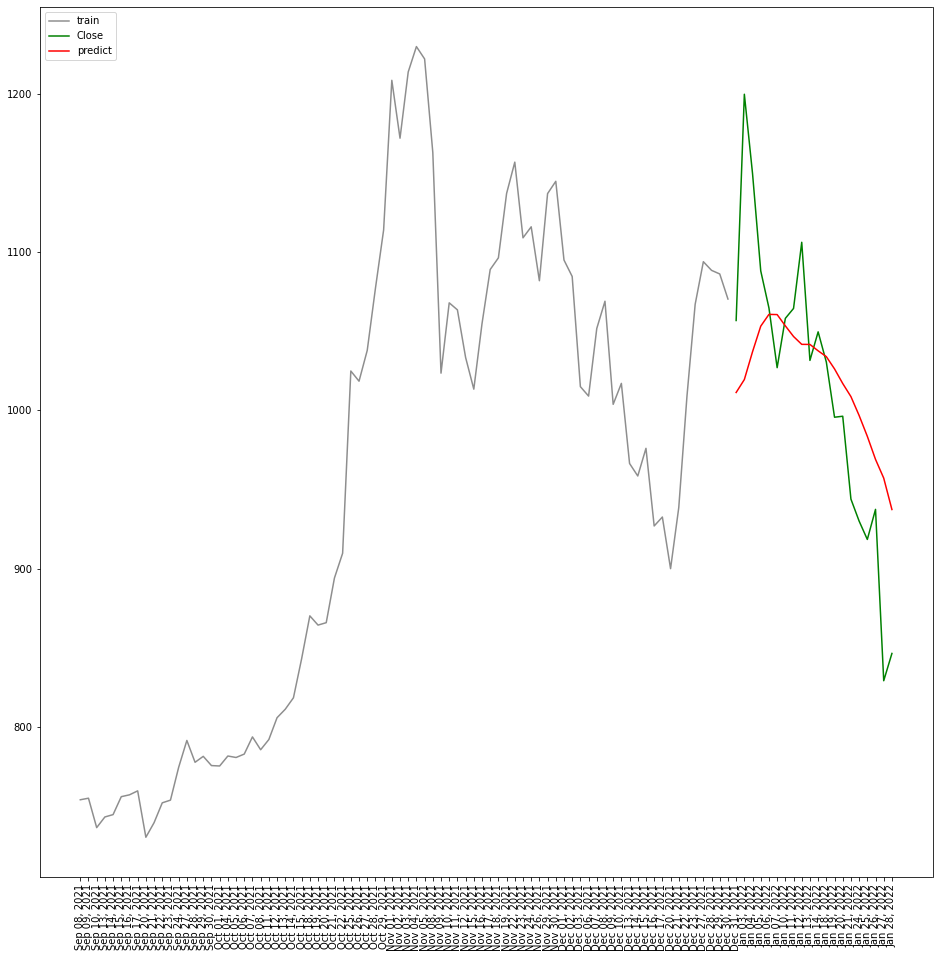

In [36]:
plt.figure(figsize=(16,16))
plt.plot(train['Date'], train['Close*'], label='train', color='#8E8E8E')
plt.plot(valid['Date'], valid['Close*'], label='Close', color='green')
plt.plot(valid['Date'], valid['Predictions'], label='predict', color='red')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()